``` sql
SELECT SUM(upokarvogi) FROM nisponno_records where Date(operation_date) >= '2020-12-23' and Date(operation_date) <= '2020-23-24';
```
Goals:
- Generate Total upkarvogi by Year and month

Challenges:
1. operation date missing values
1. operation date not compatible with date time format

Future plan:
1. fix missing operation_date values
2. fill upokarvogi null value with zero


In [1]:
# import necessary library
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
nisponno_records_table_columns_dict = {
    '1': 'id',
    '2': 'nothi_master_id',
    '3': 'nothi_part_no',
    '4': 'type',
    '5': 'nothi_onucched_id',
    '6': 'potrojari_id',
    '7': 'nothi_office_id',
    '8': 'office_id',
    '9': 'unit_id',
    '10': 'designation_id',
    '11': 'employee_id',
    '12': 'upokarvogi',
    '13': 'potrojari_internal_own',
    '14': 'potrojari_internal_other',
    '15': 'dak_srijito',
    '16': 'operation_date',
    '17': 'created',
    '18': 'modified'
}
nisponno_records_table_columns_list = list(nisponno_records_table_columns_dict.values())
nisponno_records_table_columns = nisponno_records_table_columns_list
# for key in nisponno_records_table_columns_dict.keys():
#     value = 

len(nisponno_records_table_columns)


18

### Check column length consistency

In [3]:
nisponno_records_df = pd.read_csv('../Data/nisponno_records_24_11_2021.csv')
if len(nisponno_records_table_columns) != nisponno_records_df.shape[1]: 
    print(f"previous column length: {len(nisponno_records_table_columns)}, current column_length {nisponno_records_df.shape[1]}")
    raise ValueError('office table attribute added or removed')

In [3]:
def load_nisponno_records_df():
    nisponno_records_df = pd.read_csv('../Data/nisponno_records_24_11_2021.csv', names=nisponno_records_table_columns)
    return nisponno_records_df

In [4]:
nisponno_records_df = load_nisponno_records_df()
nisponno_records_df.head()

,id,nothi_master_id,nothi_part_no,type,nothi_onucched_id,potrojari_id,nothi_office_id,office_id,unit_id,designation_id,employee_id,upokarvogi,potrojari_internal_own,potrojari_internal_other,dak_srijito,operation_date,created,modified
0,1,1,1,potrojari,1.0,0,11,11,333,817,76,0,0,0,0,2016-02-10 00:00:00,2016-11-26 12:27:29,2016-11-26 12:27:29
1,2,3,5,potrojari,7.0,0,11,11,770,1810,478,0,0,0,0,2016-02-13 00:00:00,2016-11-26 12:27:29,2016-11-26 12:27:29
2,3,3,6,potrojari,10.0,0,11,11,770,1810,478,0,0,0,0,2016-02-13 00:00:00,2016-11-26 12:27:29,2016-11-26 12:27:29
3,4,7,10,potrojari,13.0,0,11,11,333,817,76,0,0,0,0,2016-11-16 00:00:00,2016-11-26 12:27:29,2016-11-26 12:27:29
4,5,9,12,potrojari,14.0,0,11,11,770,1810,478,0,0,0,0,2016-02-14 00:00:00,2016-11-26 12:27:29,2016-11-26 12:27:29


In [3]:
# observing dataframe size
nisponno_records_df.shape
nisponno_records_df.size

NameError: name 'nisponno_records_df' is not defined

In [ ]:

# observing primary key
"min_id", min(nisponno_records_df.id.values)
"max_id", max(nisponno_records_df.id.values)
"table shape", nisponno_records_df.shape

In [6]:
# observing missing values, datatype, dataframe memory size
nisponno_records_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16416402 entries, 0 to 16416401
Data columns (total 18 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   id                        int64  
 1   nothi_master_id           int64  
 2   nothi_part_no             int64  
 3   type                      object 
 4   nothi_onucched_id         float64
 5   potrojari_id              int64  
 6   nothi_office_id           int64  
 7   office_id                 int64  
 8   unit_id                   int64  
 9   designation_id            int64  
 10  employee_id               int64  
 11  upokarvogi                int64  
 12  potrojari_internal_own    int64  
 13  potrojari_internal_other  int64  
 14  dak_srijito               int64  
 15  operation_date            object 
 16  created                   object 
 17  modified                  object 
dtypes: float64(1), int64(13), object(4)
memory usage: 2.2+ GB


In [7]:
# observing null value of every attribute
nisponno_records_df.isnull().sum()
# nisponno_records_df.upokarvogi.unique()

id                              0
nothi_master_id                 0
nothi_part_no                   0
type                            0
nothi_onucched_id           87711
potrojari_id                    0
nothi_office_id                 0
office_id                       0
unit_id                         0
designation_id                  0
employee_id                     0
upokarvogi                      0
potrojari_internal_own          0
potrojari_internal_other        0
dak_srijito                     0
operation_date                  0
created                         0
modified                        0
dtype: int64

In [4]:
# SELECT SUM(upokarvogi) FROM nisponno_records where Date(operation_date) >= '2020-12-23' and Date(operation_date) <= '2020-23-24';

# Extract mandatory attributes for offices graph analysis
nisponno_records_df = load_nisponno_records_df()
print(f"Initial dataframe shape {nisponno_records_df.shape}")
nisponno_records_df = nisponno_records_df[['id', 'upokarvogi', 'operation_date']] 
# remove null values
nisponno_records_df = nisponno_records_df.loc[nisponno_records_df.operation_date.notnull()]
print(f"dataframe shape after removing operation_date null value {nisponno_records_df.shape}")
# add new column: cretead_new as datetime field from operation_date column
nisponno_records_df['opeation_date'] = pd.to_datetime(nisponno_records_df['operation_date'], errors='coerce')
# errors{‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
    # If ‘raise’, then invalid parsing will raise an exception.
    # If ‘coerce’, then invalid parsing will be set as NaT.
    # If ‘ignore’, then invalid parsing will return the input.
nisponno_records_df.shape
# again remove null values based on opeation_date field
nisponno_records_df = nisponno_records_df.loc[nisponno_records_df.opeation_date.notnull()]
nisponno_records_df.shape

Initial dataframe shape (16416402, 18)
dataframe shape after removing operation_date null value (16416402, 3)


(16416402, 4)

(16416402, 4)

In [10]:
# nisponno_records_df.info()

In [5]:
# Extract years and months from created column
operation_date_datetime_index = pd.DatetimeIndex(nisponno_records_df['opeation_date'])
years = operation_date_datetime_index.year.values.astype(str)
months = operation_date_datetime_index.month.values.astype(str)
type(years)
type(months)
set(years)
set(months)

numpy.ndarray

numpy.ndarray

{'2016', '2017', '2018', '2019', '2020', '2021'}

{'1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9'}

In [6]:
# type(years[0])
nisponno_records_df['year'] = years
nisponno_records_df['month'] = months
nisponno_records_df.shape

(16416402, 6)

In [9]:
# save the new dataframe as csv
nisponno_records_df.to_csv('../Cleaned_data/upokarvogi.csv', index=False)

In [8]:
# observe number of offices in every year 
nisponno_records_year_by = nisponno_records_df.groupby('year')['year'].count()
nisponno_records_year_by

year
2016      71359
2017    1327923
2018    2988585
2019    5178475
2020    4877229
2021    1972831
Name: year, dtype: int64

(array([  71359.,       0., 1327923.,       0., 2988585.,       0.,
        5178475.,       0., 4877229., 1972831.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'years')

Text(0, 0.5, 'upokarvogi (in thousands)')

Text(0.5, 1.0, 'upokarvogi in year base')

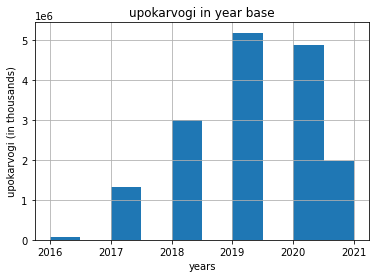

In [11]:
plt.hist(nisponno_records_df['year'])


plt.xlabel('years')
plt.ylabel('upokarvogi (in thousands)')
plt.title('upokarvogi in year base')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(40, 160)
# plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

In [9]:
month_map ={
    '1': 'January',
    '01': 'January',
    '2': 'February',
    '02': 'February',
    '3': 'March',
    '03': 'March',
    '4': 'April',
    '04': 'April',
    '5': 'May',
    '05': 'May',
    '6': 'June',
    '06': 'June',
    '7': 'July',
    '07': 'July',
    '8': 'August',
    '08': 'August',
    '9': 'September',
    '09': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December',
    'unknown': 'unknown',
}

In [10]:
# Generate general_series and drilldown series for bar graph
# general series: year: number of officess
nisponno_records_year_by = nisponno_records_df.groupby('year')
def generate_general_series_drilldown_series(dataframe_year_by, general_series_name):
    general_series = [
        
        {
            'name': general_series_name,
            'colorByPoint': True,
            'data': [],
        }
    ]
    drilldown_series = []

    for year, year_frame in dataframe_year_by:
        year = str(year)
        # year, year_frame.shape
        temporary_dict_general = {'name': year, 'y': year_frame.shape[0], 'drilldown': year}
        general_series[0]['data'].append(temporary_dict_general)
        temporary_dict_drilldown = {
            'name': year,
            'id': year,
            'data': [],
        }
        month_group_by = year_frame.groupby('month')
        for month, month_frame in month_group_by:
          
            # mg, mf.shape[0]
            month = str(month)
            month = month_map[month]

            # lst = [month, month_frame.shape[0]]
            lst = [month, month_frame['upokarvogi'].sum()]
            temporary_dict_drilldown['data'].append(lst)
        drilldown_series.append(temporary_dict_drilldown)
    return general_series, drilldown_series

general_series, drilldown_series = generate_general_series_drilldown_series(nisponno_records_year_by, 'upokarvogi')


In [11]:
general_series
drilldown_series

[{'name': 'upokarvogi',
  'colorByPoint': True,
  'data': [{'name': '2016', 'y': 71359, 'drilldown': '2016'},
   {'name': '2017', 'y': 1327923, 'drilldown': '2017'},
   {'name': '2018', 'y': 2988585, 'drilldown': '2018'},
   {'name': '2019', 'y': 5178475, 'drilldown': '2019'},
   {'name': '2020', 'y': 4877229, 'drilldown': '2020'},
   {'name': '2021', 'y': 1972831, 'drilldown': '2021'}]}]

[{'name': '2016',
  'id': '2016',
  'data': [['October', 0],
   ['November', 0],
   ['December', 0],
   ['February', 0],
   ['March', 0],
   ['April', 0],
   ['May', 0],
   ['June', 0],
   ['July', 0],
   ['August', 0],
   ['September', 0]]},
 {'name': '2017',
  'id': '2017',
  'data': [['January', 0],
   ['October', 0],
   ['November', 0],
   ['December', 0],
   ['February', 0],
   ['March', 0],
   ['April', 0],
   ['May', 0],
   ['June', 0],
   ['July', 0],
   ['August', 0],
   ['September', 0]]},
 {'name': '2018',
  'id': '2018',
  'data': [['January', 0],
   ['October', 0],
   ['November', 0],
   ['December', 0],
   ['February', 0],
   ['March', 0],
   ['April', 0],
   ['May', 0],
   ['June', 0],
   ['July', 0],
   ['August', 0],
   ['September', 0]]},
 {'name': '2019',
  'id': '2019',
  'data': [['January', 0],
   ['October', 0],
   ['November', 0],
   ['December', 0],
   ['February', 0],
   ['March', 0],
   ['April', 0],
   ['May', 0],
   ['June', 0],
   ['July', 0],
   ['August'

In [13]:

month_list =['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September', 'October','November', 'December', 'unknown' ]
upokarvogi = {}

dataframe_year_by = nisponno_records_df.groupby('year')

for year, year_frame in dataframe_year_by:
    year = str(year)
    # year, year_frame.shape
    upokarvogi_in_year = int(year_frame['upokarvogi'].sum())
    
    month_dict = {}

    month_group_by = year_frame.groupby('month')
    for month, month_frame in month_group_by:

        # mg, mf.shape[0]
        month = str(month)
        month = month_map[month]
        month_dict[month] = int(month_frame['upokarvogi'].sum())
    if upokarvogi_in_year != 0:
        month_dict = dict(sorted(month_dict.items(), key=lambda x:month_list.index(x[0])))
        dic = {'count': upokarvogi_in_year, 'month_map': month_dict}
        upokarvogi[year] = dic

print(upokarvogi)

{'2020': {'count': 35869, 'month_map': {'January': 0, 'February': 0, 'March': 0, 'April': 0, 'May': 0, 'June': 0, 'July': 0, 'August': 0, 'September': 0, 'October': 0, 'November': 0, 'December': 35869}}, '2021': {'count': 4624183, 'month_map': {'January': 57472, 'February': 33280, 'March': 31596, 'April': 57782, 'May': 515204, 'June': 783717, 'July': 513562, 'August': 688022, 'September': 721948, 'October': 675667, 'November': 545933}}}


In [14]:
import json

dictionary = upokarvogi

with open('../Cleaned_data/upokarvogi.json', 'w', encoding='utf-8') as f:
    json.dump(dictionary, f, ensure_ascii=False, indent=4)

with open('../Cleaned_data/upokarvogi.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)
    print(data)

{'2020': {'count': 35869, 'month_map': {'January': 0, 'February': 0, 'March': 0, 'April': 0, 'May': 0, 'June': 0, 'July': 0, 'August': 0, 'September': 0, 'October': 0, 'November': 0, 'December': 35869}}, '2021': {'count': 4624183, 'month_map': {'January': 57472, 'February': 33280, 'March': 31596, 'April': 57782, 'May': 515204, 'June': 783717, 'July': 513562, 'August': 688022, 'September': 721948, 'October': 675667, 'November': 545933}}}


# End End End